In [ ]:
# ====================================================================
# 0️⃣ Import Library & Setup
# ====================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import savgol_filter
from scipy.interpolate import griddata
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize'] = (12,8)
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn')
sns.set_palette("husl")

print("="*80)
print("ANALISIS DATASET: DAMPAK PENGGUNAAN TIKTOK TERHADAP FUNGSI KOGNITIF REMAJA")
print("="*80)

ANALISIS DATASET: DAMPAK PENGGUNAAN TIKTOK TERHADAP FUNGSI KOGNITIF REMAJA


In [ ]:
# ====================================================================
# 1️⃣ Baca Data
# ====================================================================
df = pd.read_csv('assalammualaikum.csv', delimiter=';')
print("\n1. DATA TERBACA ✅")
print(df.head())


1. DATA TERBACA ✅
   id  usia jenis_kelamin  durasi_harian_tiktok_menit  \
0   1    13     Perempuan                         180   
1   2    14     Laki-laki                         240   
2   3    15     Perempuan                         120   
3   4    16     Laki-laki                         300   
4   5    17     Perempuan                          90   

   frekuensi_buka_per_hari  lama_penggunaan_bulan  skor_iq_sebelum  \
0                       25                      8              108   
1                       35                     12              112   
2                       18                      6              115   
3                       42                     18              105   
4                       12                      4              118   

   skor_iq_sesudah  skor_atensi_sebelum  skor_atensi_sesudah  ...  \
0              102                   85                   78  ...   
1              104                   88                   79  ...   
2         

In [ ]:
# ====================================================================
# 2️⃣ Persiapan Statistik
# ====================================================================
total_samples = len(df)
total_features = len(df.columns)
missing_percentage = (df.isnull().sum().sum() / (total_samples * total_features)) * 100

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Hitung outlier
outlier_counts = {}
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col]<lower) | (df[col]>upper)]
    outlier_counts[col] = len(outliers)

total_outliers = sum(outlier_counts.values())

# Tambahkan kolom perubahan IQ
df['iq_change'] = df['skor_iq_sesudah'] - df['skor_iq_sebelum']
corr_iq = df['iq_change'].corr(df['durasi_harian_tiktok_menit'])


📊 Membuat Heatmap Korelasi + Signifikansi...


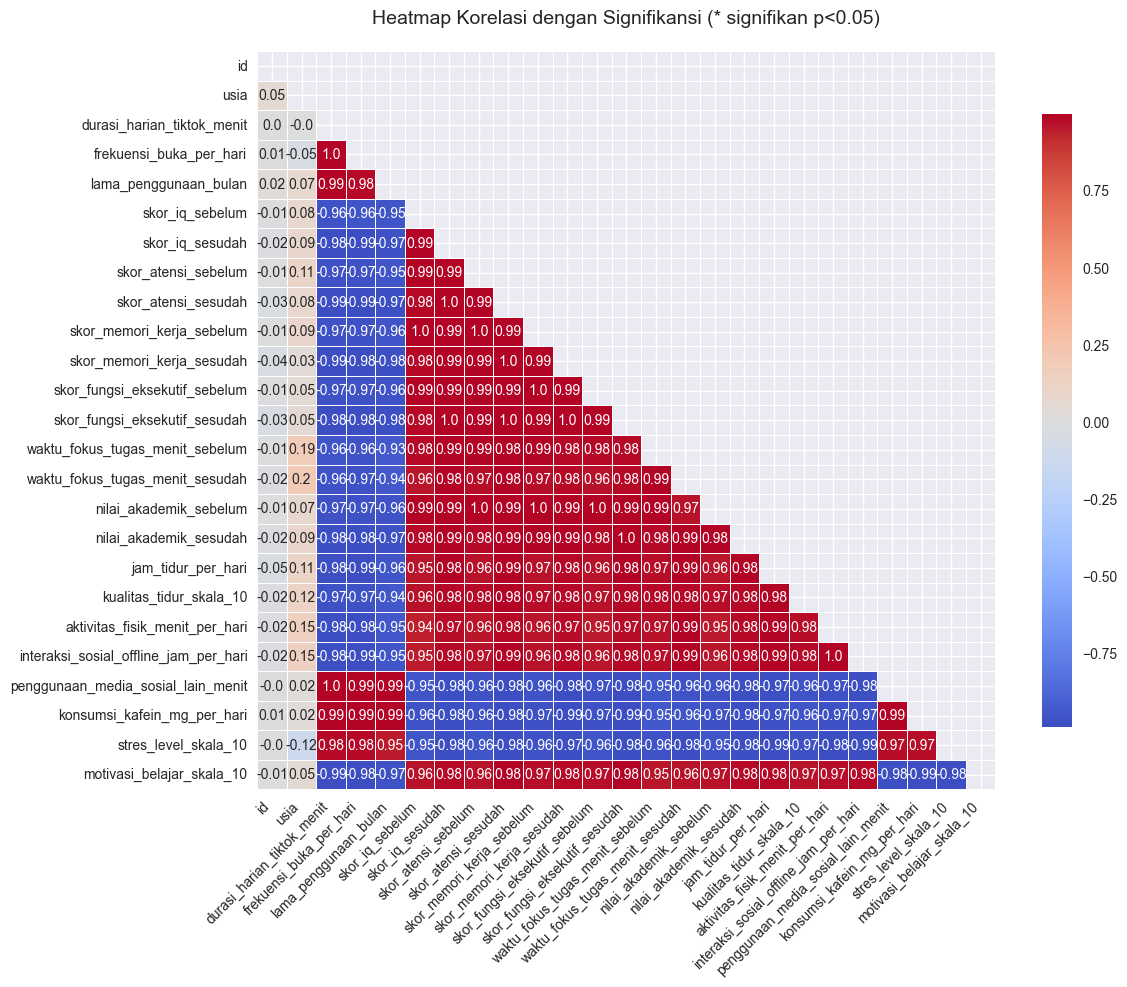

In [ ]:
from scipy.stats import pearsonr

print("\n📊 Membuat Heatmap Korelasi + Signifikansi...")

# Hitung korelasi dan p-value
corr = df[numeric_columns].corr()
pvals = pd.DataFrame(np.ones_like(corr), columns=corr.columns, index=corr.index)

for row in numeric_columns:
    for col in numeric_columns:
        if row != col:
            r, p = pearsonr(df[row], df[col])
            corr.loc[row, col] = r
            pvals.loc[row, col] = p

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))

# Teks untuk signifikan (p<0.05) atau tidak
annotations = corr.round(2).astype(str)
for i in range(len(corr)):
    for j in range(len(corr)):
        if i < j:
            if pvals.iloc[i, j] < 0.05:
                annotations.iloc[i, j] += "*"

sns.heatmap(
    corr,
    mask=mask,
    annot=annotations,
    fmt='',
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Heatmap Korelasi dengan Signifikansi (* signifikan p<0.05)", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



🫧 Membuat Bubble Plot Korelasi...


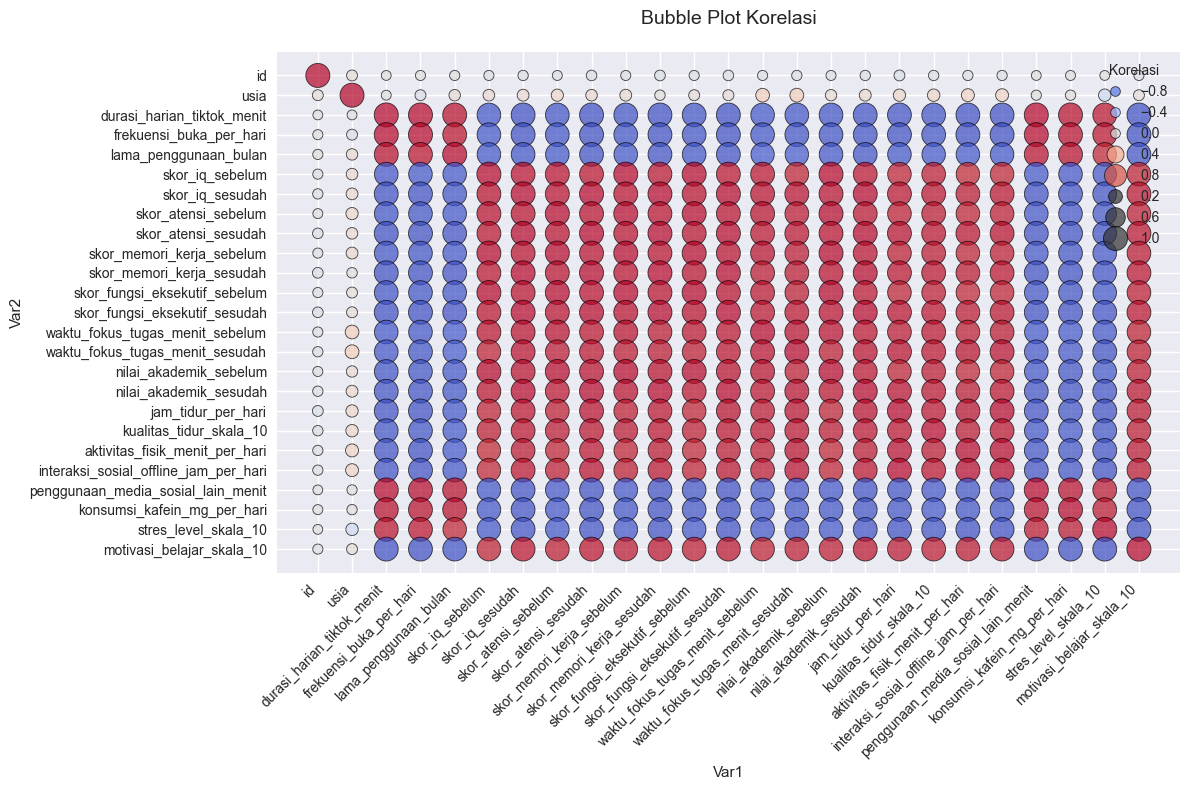

In [ ]:
print("\n🫧 Membuat Bubble Plot Korelasi...")

corr_melt = corr.reset_index().melt(id_vars='index')
corr_melt.columns = ['Var1', 'Var2', 'Correlation']

plt.figure(figsize=(12, 8))
bubble = sns.scatterplot(
    data=corr_melt, 
    x='Var1', y='Var2',
    size=abs(corr_melt['Correlation']),
    hue=corr_melt['Correlation'],
    palette='coolwarm',
    sizes=(50, 300),
    alpha=0.7,
    edgecolor='black'
)

plt.title("Bubble Plot Korelasi", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Korelasi")
plt.tight_layout()
plt.show()



🔗 Membuat Pairplot...


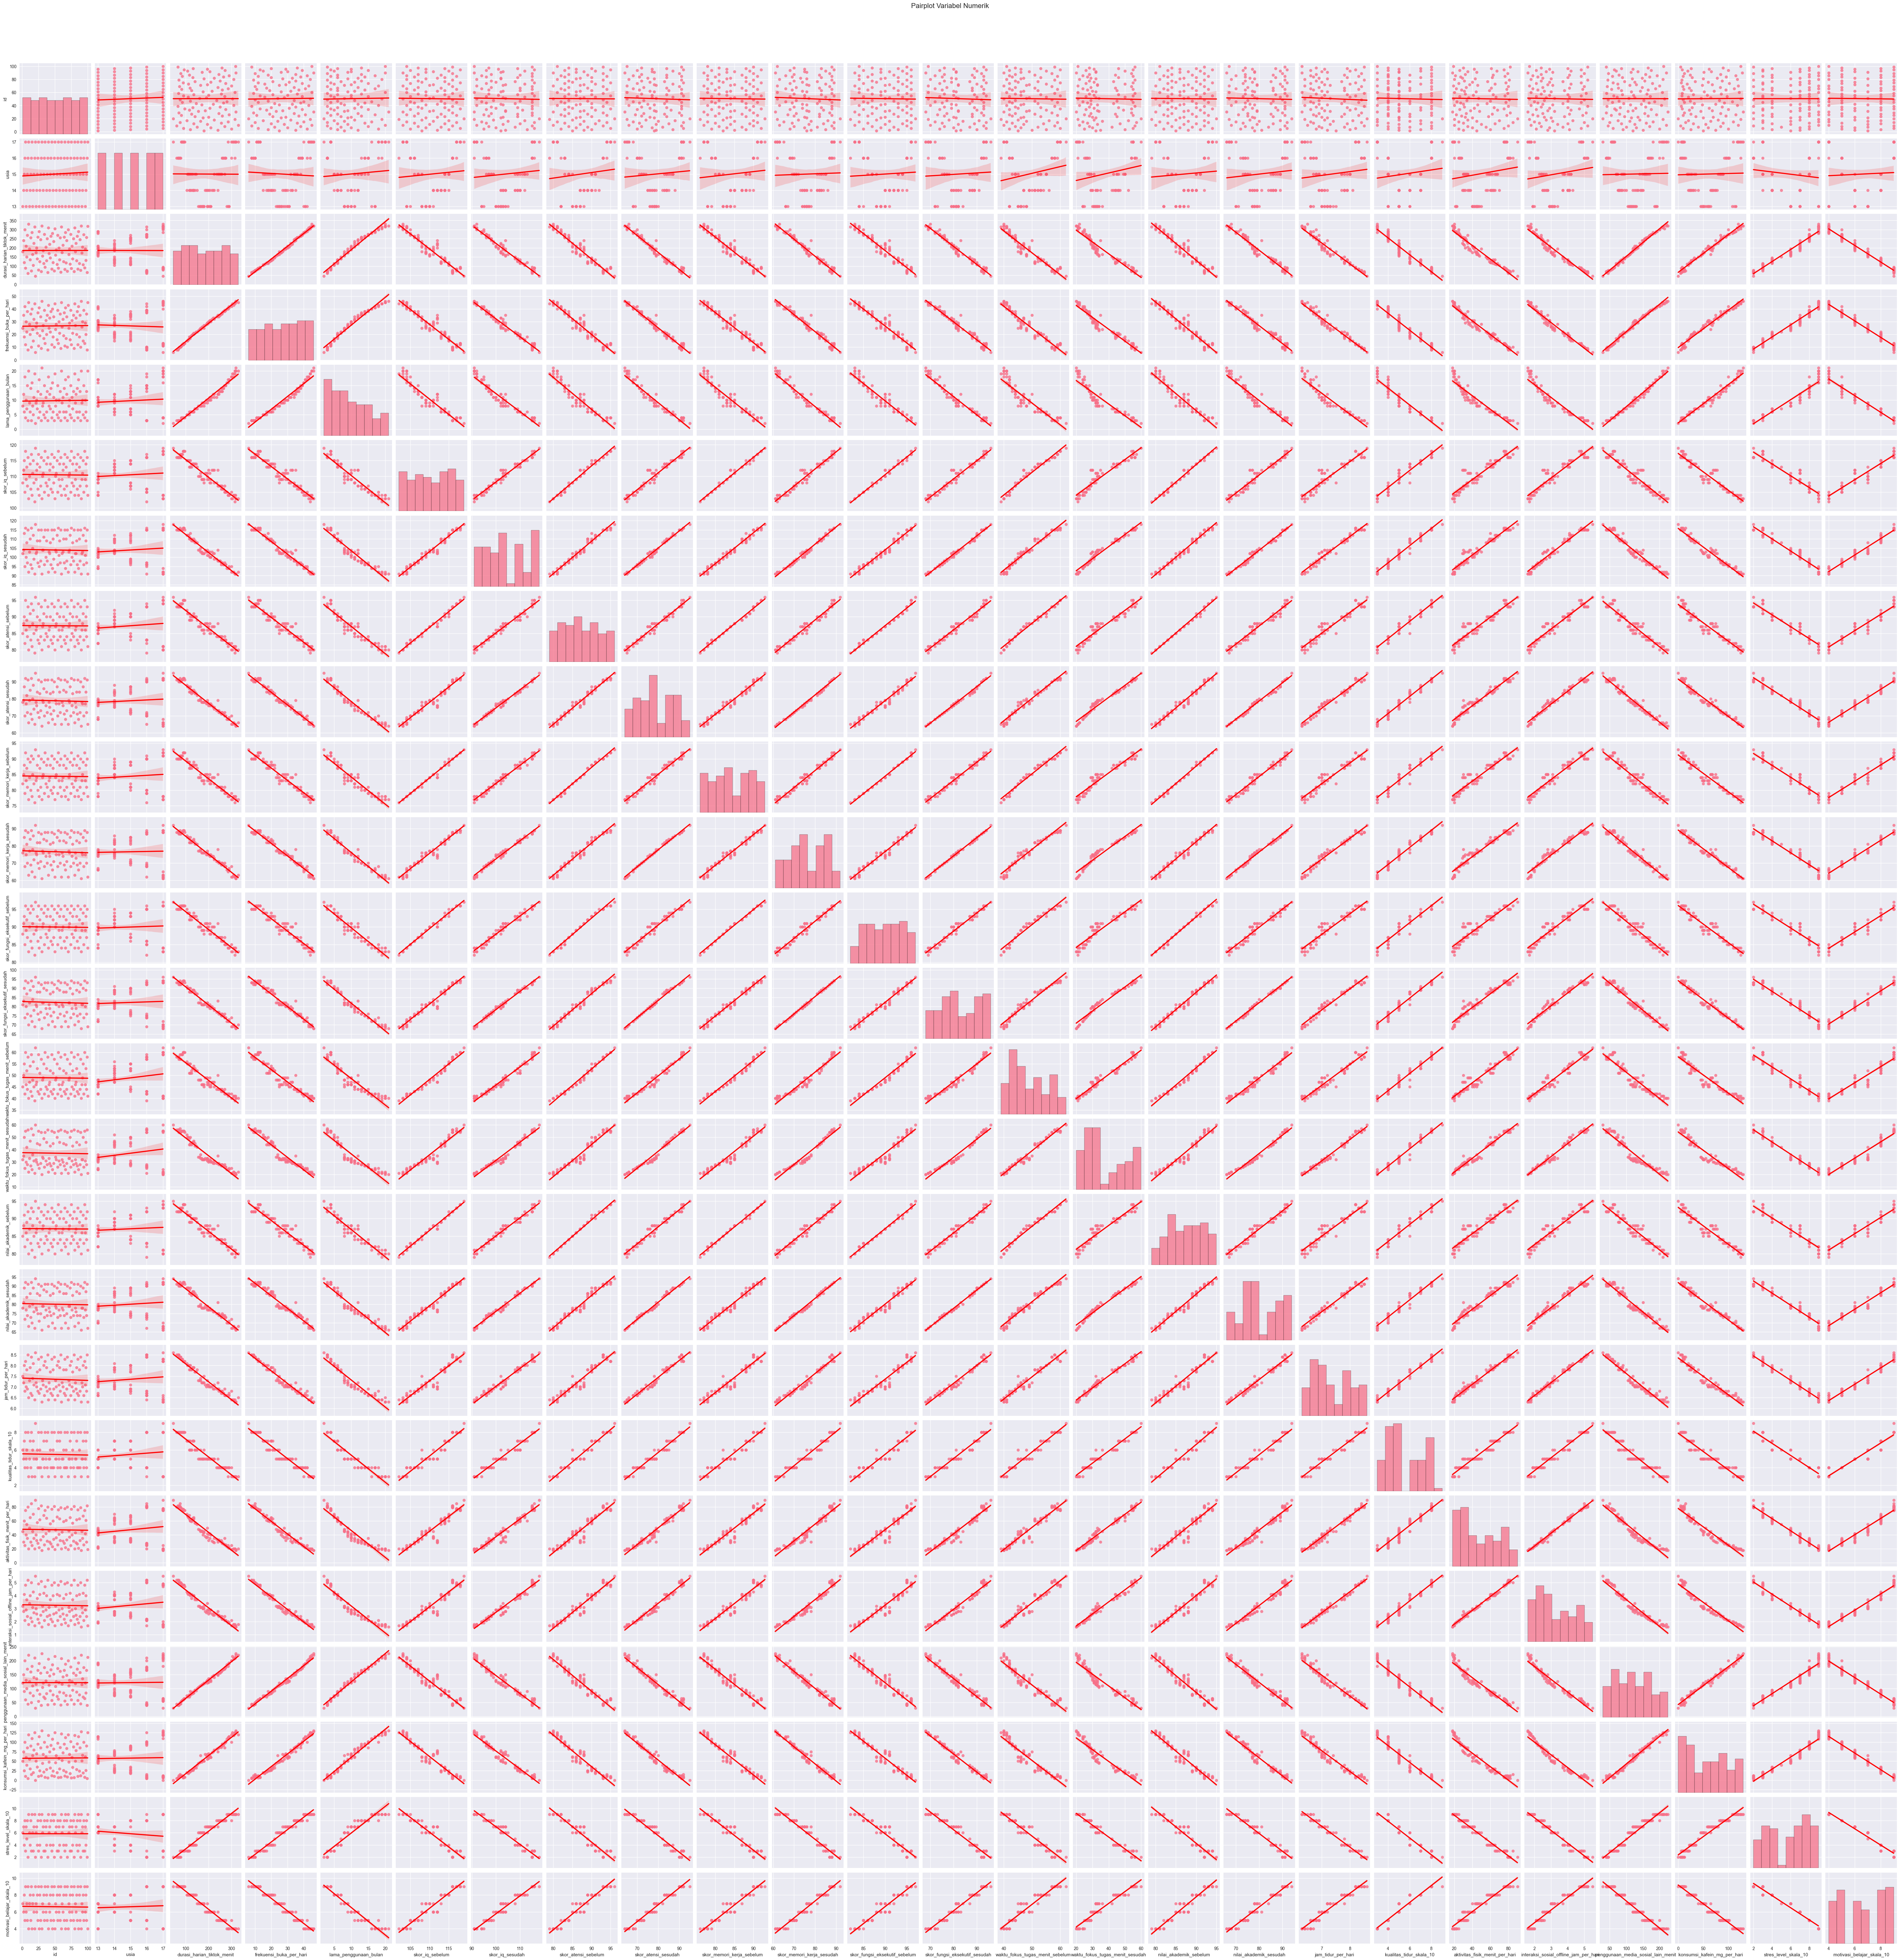

In [ ]:
print("\n🔗 Membuat Pairplot...")

sns.pairplot(df[numeric_columns], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Pairplot Variabel Numerik", fontsize=16, y=1.02)
plt.show()


In [ ]:
# ====================================================================
# 4️⃣ Kesimpulan & Rekomendasi
# ====================================================================
print("\n\n4️⃣ KESIMPULAN & REKOMENDASI")
print("-"*50)

total_score = 0

# ✅ Kelengkapan Data
if missing_percentage == 0:
    completeness_score = 25
    print(f"✅ Kelengkapan Data: {completeness_score}/25 - Tidak ada missing values")
else:
    completeness_score = max(0, 25 - missing_percentage)
    print(f"⚠️ Kelengkapan Data: {completeness_score:.1f}/25 - Ada {missing_percentage:.2f}% missing")
total_score += completeness_score

# ✅ Ukuran Dataset
if total_samples >= 1000:
    size_score = 20
    print(f"✅ Ukuran Dataset: {size_score}/20 - Besar")
elif total_samples >= 500:
    size_score = 15
    print(f"✅ Ukuran Dataset: {size_score}/20 - Sedang")
else:
    size_score = 10
    print(f"⚠️ Ukuran Dataset: {size_score}/20 - Kecil")
total_score += size_score

# ✅ Kualitas Fitur
outlier_ratio = total_outliers / total_samples
if outlier_ratio < 0.05:
    feature_score = 25
    print(f"✅ Kualitas Fitur: {feature_score}/25 - Outlier minimal")
elif outlier_ratio < 0.1:
    feature_score = 20
    print(f"✅ Kualitas Fitur: {feature_score}/25 - Outlier terkendali")
else:
    feature_score = 15
    print(f"⚠️ Kualitas Fitur: {feature_score}/25 - Outlier banyak")
total_score += feature_score

# ✅ Korelasi
if abs(corr_iq) > 0.7:
    corr_score = 20
    strength = "Kuat"
elif abs(corr_iq) > 0.4:
    corr_score = 15
    strength = "Sedang"
else:
    corr_score = 10
    strength = "Lemah"
print(f"✅ Korelasi Durasi TikTok vs IQ Change: {corr_iq:.3f} ({strength}), skor {corr_score}/20")
total_score += corr_score

# ✅ Keragaman
if 'jenis_konten_dominan' in df.columns:
    diversity = df['jenis_konten_dominan'].nunique()
    diversity_score = min(10, diversity*2)
    print(f"✅ Keragaman Konten: {diversity_score}/10 - {diversity} jenis konten")
    total_score += diversity_score



4️⃣ KESIMPULAN & REKOMENDASI
--------------------------------------------------
✅ Kelengkapan Data: 25/25 - Tidak ada missing values
⚠️ Ukuran Dataset: 10/20 - Kecil
✅ Kualitas Fitur: 25/25 - Outlier minimal
✅ Korelasi Durasi TikTok vs IQ Change: -0.973 (Kuat), skor 20/20
✅ Keragaman Konten: 10/10 - 10 jenis konten


In [ ]:
# ====================================================================
# 5️⃣ Ringkasan
# ====================================================================
print("\n🏆 Total Skor Kelayakan: {:.1f}/100".format(total_score))

if total_score >= 80:
    grade = "A (Excellent)"
    note = "Dataset sangat layak untuk AI/ML"
elif total_score >= 70:
    grade = "B (Good)"
    note = "Dataset layak dengan kualitas baik"
elif total_score >= 60:
    grade = "C (Fair)"
    note = "Dataset cukup, perbaikan disarankan"
else:
    grade = "D (Poor)"
    note = "Dataset kurang layak, perlu banyak perbaikan"

print(f"📊 Grade: {grade}")
print(f"💡 Catatan: {note}")

print("\n✅ Rekomendasi Model:")
print("   - Random Forest")
print("   - Gradient Boosting")
print("   - Linear Regression")
print("   - Neural Network")

print("\n✅ Preprocessing Disarankan:")
print("   - Normalisasi & Encoding")
print("   - Outlier Treatment")
print("   - Feature Engineering")

print("="*80)
print("ANALISIS SELESAI")
print("="*80)


🏆 Total Skor Kelayakan: 90.0/100
📊 Grade: A (Excellent)
💡 Catatan: Dataset sangat layak untuk AI/ML

✅ Rekomendasi Model:
   - Random Forest
   - Gradient Boosting
   - Linear Regression
   - Neural Network

✅ Preprocessing Disarankan:
   - Normalisasi & Encoding
   - Outlier Treatment
   - Feature Engineering
ANALISIS SELESAI
